# London Bike Sharing Data Analysis

**Author:** Sebastian Gonzalez

**Project Overview:** This Jupyter Notebook outlines the initial data processing and exploration steps of the London Bike Sharing dataset. The dataset was sourced from Kaggle and provides extensive details on bike sharing usage within London, including weather conditions, time stamps, and user types. The processed data will be used for further visualization in Tableau.

## Data Source
The dataset used in this analysis is the London Bike Sharing Dataset available at: [Kaggle Dataset](https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset)

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
bikes = pd.read_csv("london_merged.csv")

In [3]:
# Display the first few rows of the dataframe to understand its structure
bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


## Data Exploration

In this section, we will explore the dataset to understand its composition, such as the number of records, column data types, and unique values in certain columns.

In [4]:
# Getting an overview of the dataset
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
# Checking the shape of the dataset
print("Dataset shape:", bikes.shape)

Dataset shape: (17414, 10)


In [6]:
# Displaying basic statistical details
bikes.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [7]:
# Checking for missing values
print("Missing values in each column:\n", bikes.isnull().sum())

Missing values in each column:
 timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64


### Visualizing Unique Values in Key Columns

We will create bar charts to visually represent the frequency of unique values in the 'weather_code' and 'season' columns.

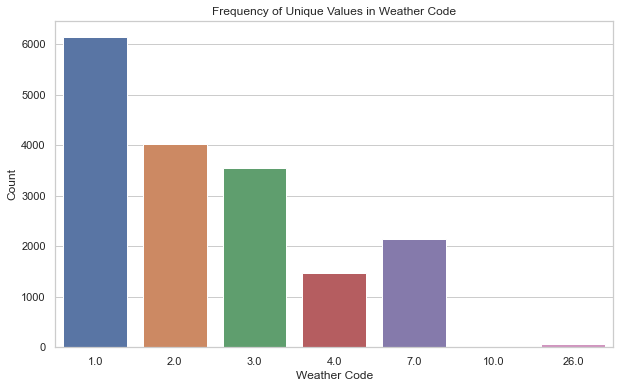

In [8]:
# Setting the visual style for the plots
sns.set(style="whitegrid")

# Plotting the frequency of unique values in the 'weather_code' column
plt.figure(figsize=(10, 6))
sns.countplot(x='weather_code', data=bikes)
plt.title('Frequency of Unique Values in Weather Code')
plt.xlabel('Weather Code')
plt.ylabel('Count')
plt.show()

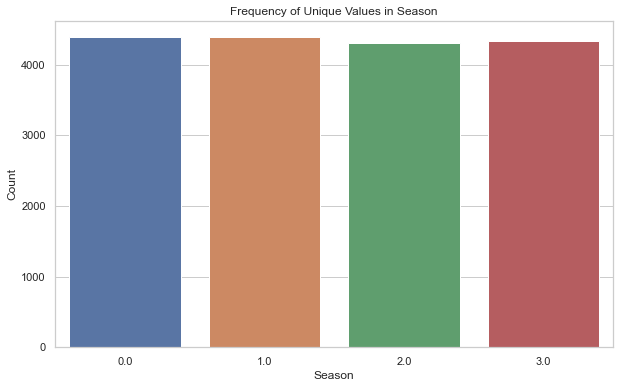

In [9]:
# Plotting the frequency of unique values in the 'season' column
plt.figure(figsize=(10, 6))
sns.countplot(x='season', data=bikes)
plt.title('Frequency of Unique Values in Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

### Trend Analysis

Analyzing trends over time to understand the usage pattern of bike sharing.

In [10]:
# Converting 'timestamp' to datetime and setting it as index
bikes['time'] = pd.to_datetime(bikes['timestamp'])
bikes.set_index('time', inplace=True)

In [11]:
# After setting 'time' as the index, the original 'timestamp' column is no longer needed.
# Removing it to avoid confusion and redundancy in the dataset.
bikes.drop(columns='timestamp', inplace=True)

In [12]:
# Confirming the timestamp conversion
print("Data type of 'time' column:", bikes.index.dtype)

Data type of 'time' column: datetime64[ns]


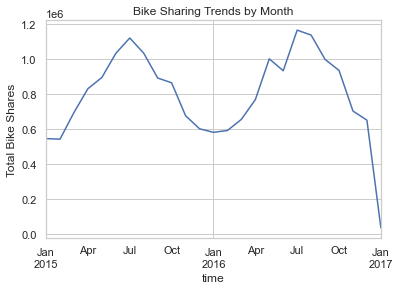

In [13]:
# Plotting bike sharing trends by month
bikes.resample('M')['cnt'].sum().plot(title='Bike Sharing Trends by Month')
plt.ylabel('Total Bike Shares')
plt.show()

## Data Cleaning and Transformation

This section involves renaming columns for better readability, converting data types for accurate analysis, and mapping coded values to meaningful labels.

In [14]:
# Renaming columns for clarity
new_cols_dict ={
    'timestamp':'time',
    'cnt':'count', 
    't1':'temp_real_C',
    't2':'temp_feels_like_C',
    'hum':'humidity_percent',
    'wind_speed':'wind_speed_kph',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'
}
bikes.rename(new_cols_dict, axis=1, inplace=True)

In [15]:
# Converting humidity values to a percentage format
bikes.humidity_percent = bikes.humidity_percent / 100

In [16]:
# Mapping integer values to meaningful season and weather labels
season_dict = {
    '0.0':'spring',
    '1.0':'summer',
    '2.0':'autumn',
    '3.0':'winter'
}

weather_dict = {
    '1.0':'Clear',
    '2.0':'Scattered clouds',
    '3.0':'Broken clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall'
}

bikes.season = bikes.season.astype('str').map(season_dict)
bikes.weather = bikes.weather.astype('str').map(weather_dict)

In [17]:
# Verifying the transformations
bikes.head()

,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
time,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter
2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter
2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter
2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter
2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter


## Exporting Processed Data

The cleaned and transformed data is now ready for visualization. We'll export it to an Excel file, which will be used for creating dashboards in Tableau.

In [18]:
# Exporting the dataframe to Excel
output_file_name = "London_Bike_Sharing_Processed_Data.xlsx"
bikes.to_excel(output_file_name, sheet_name='Data')

print(f"Data exported successfully to {output_file_name}")

Data exported successfully to London_Bike_Sharing_Processed_Data.xlsx
